# Unzip Data

In [ ]:
!unzip /content/gdrive/"My Drive"/cell-images-for-detecting-malaria.zip


Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import os
print(os.listdir("/content/cell_images"))

['cell_images', 'Uninfected', 'Parasitized']


In [ ]:
img_dir='/content/cell_images/cell_images/'


In [ ]:
path=Path(img_dir)
path

PosixPath('/content/cell_images/cell_images')

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

In [ ]:
print(f'Classes: \n {data.classes}')


Classes: 
 ['Parasitized', 'Uninfected']


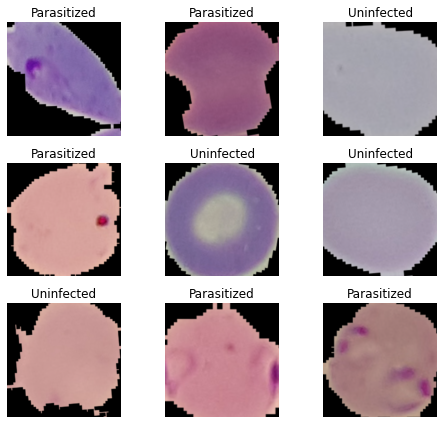

In [ ]:
data.show_batch(rows=3, figsize=(7,6))


# AlexNet

In [ ]:
learn = create_cnn(data, models.alexnet, metrics=accuracy, model_dir="/tmp/model/")


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


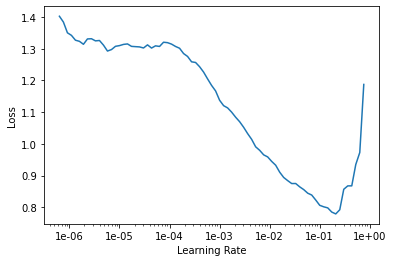

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6,1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.258521,0.204668,0.935402,02:38
1,0.257038,0.165299,0.942660,02:34
2,0.208809,0.154592,0.947015,02:33
3,0.194607,0.144580,0.950281,02:33
4,0.173225,0.138765,0.951189,02:34
5,0.200191,0.136228,0.952640,02:33


In [ ]:
learn.save('stage-1')


In [ ]:
learn.unfreeze()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


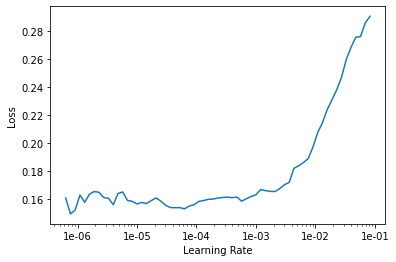

In [ ]:
learn.lr_find()
learn.recorder.plot()


In [ ]:
learn.fit_one_cycle(4, max_lr=slice(5e-6,5e-5 ))


epoch,train_loss,valid_loss,accuracy,time
0,0.161857,0.128799,0.953729,02:40
1,0.157624,0.119450,0.957539,02:39
2,0.149487,0.115929,0.957902,02:38
3,0.145985,0.114725,0.958447,02:39


In [ ]:
learn.save('stage-2')


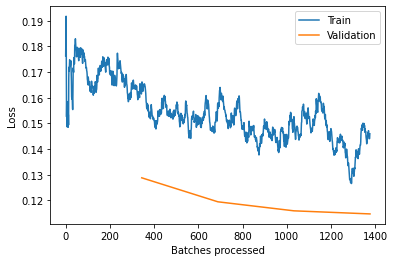

In [ ]:
learn.recorder.plot_losses()


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


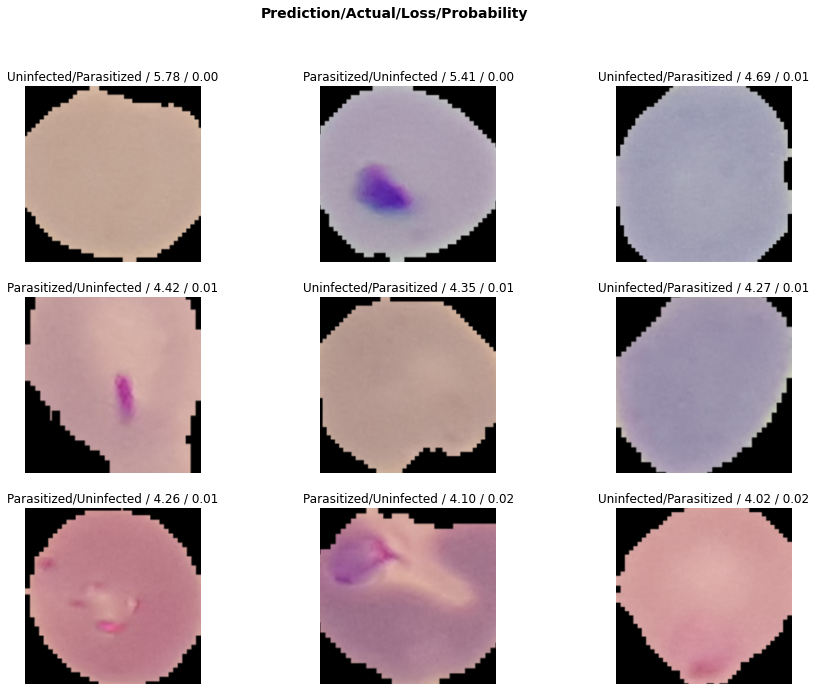

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


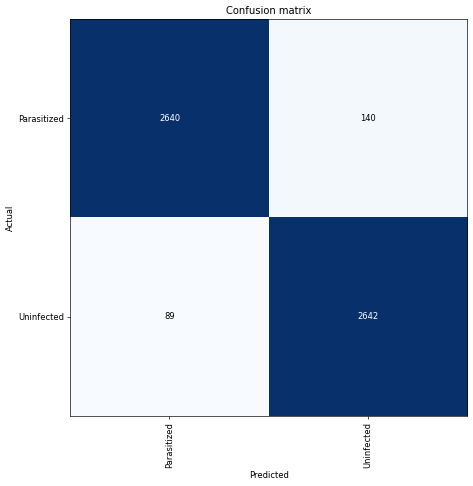

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)


# RESNET34


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

In [ ]:
img_dir='../content/cell_images/cell_images/'

In [ ]:
path=Path(img_dir)
path

PosixPath('../content/cell_images/cell_images')

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

In [ ]:
print(f'Classes: \n {data.classes}')

Classes: 
 ['Parasitized', 'Uninfected']


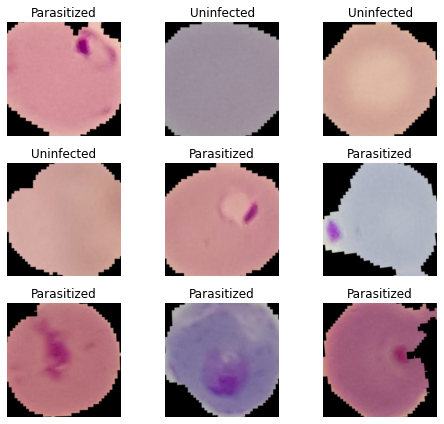

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


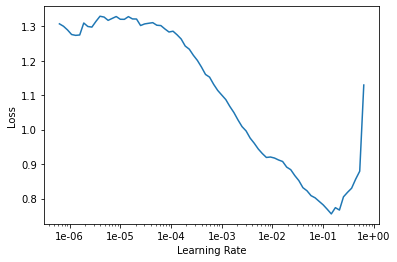

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6,1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.197310,0.164542,0.938850,03:19
1,0.179227,0.317878,0.837960,03:18
2,0.143181,0.147928,0.957177,03:15
3,0.126815,0.110075,0.962257,03:15
4,0.107863,0.092104,0.965705,03:15
5,0.099012,0.086012,0.967338,03:16


In [ ]:
learn.save('stage-1')


In [ ]:
learn.unfreeze()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


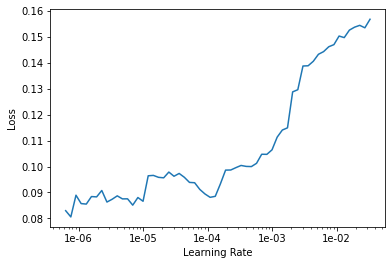

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(5e-6,5e-5 ))


epoch,train_loss,valid_loss,accuracy,time
0,0.098187,0.089448,0.967701,03:35
1,0.095736,0.084179,0.967520,03:36
2,0.087380,0.079147,0.969153,03:33
3,0.089504,0.078606,0.970604,03:34


In [ ]:
learn.save('stage-2')


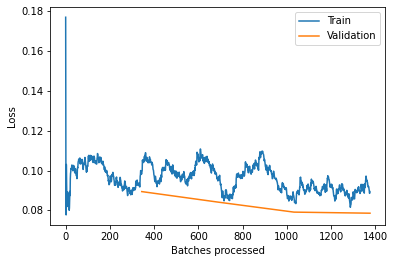

In [ ]:
learn.recorder.plot_losses()


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


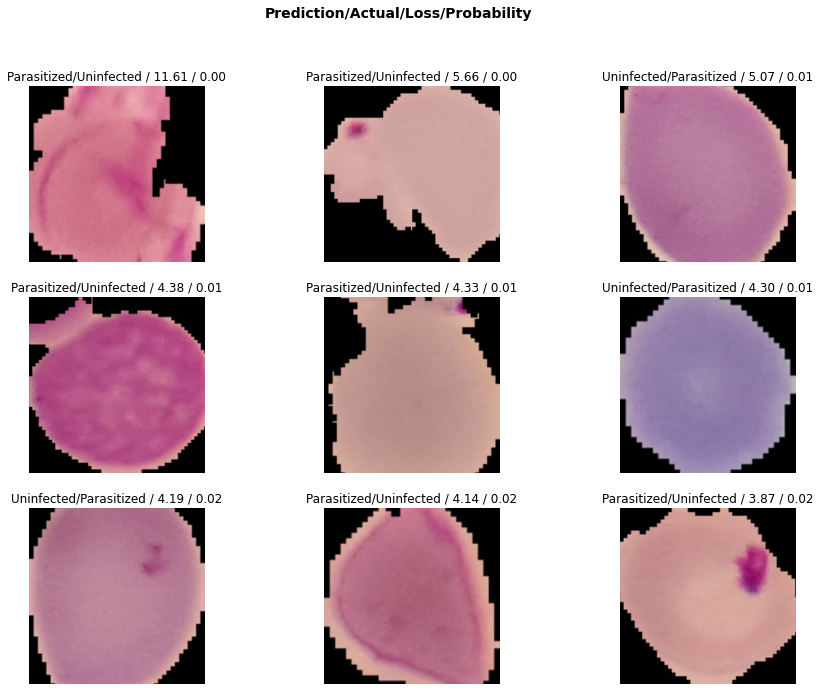

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


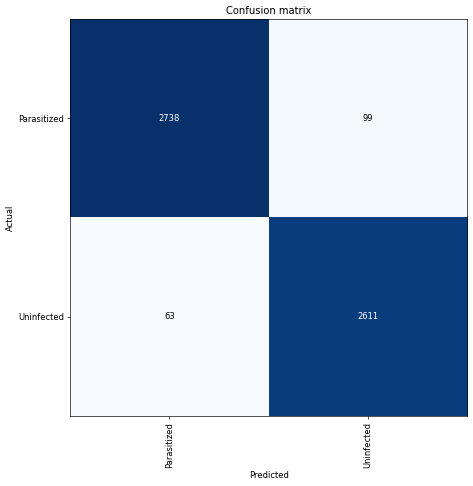

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)


In [ ]:
interp.most_confused(min_val=2)


[('Parasitized', 'Uninfected', 99), ('Uninfected', 'Parasitized', 63)]

In [ ]:
#inference
pred_data= ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

In [ ]:
predictor=create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/").load('stage-2')


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
pred_data.single_from_classes(path, pred_data.classes)


ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: ../content/cell_images/cell_images;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: ../content/cell_images/cell_images;

Test: None

Category Parasitized

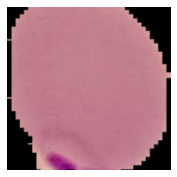

In [ ]:
x,y = data.valid_ds[3]
x.show()
data.valid_ds.y[3]

In [ ]:
pred_class,pred_idx,outputs = predictor.predict(x)
pred_class

Category Parasitized

In [ ]:
def heatMap(x,y,data, learner, size=(0,224,224,0)):
    """HeatMap"""
    
    # Evaluation mode
    m=learner.model.eval()
    
    # Denormalize the image
    xb,_ = data.one_item(x)
    xb_im = Image(data.denorm(xb)[0])
    xb = xb.cuda()
    
    # hook the activations
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(y)].backward()

    # Activations    
    acts=hook_a.stored[0].cpu()
    
    # Avg of the activations
    avg_acts=acts.mean(0)
    
    # Show HeatMap
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(avg_acts, alpha=0.5, extent=size,
              interpolation='bilinear', cmap='magma')

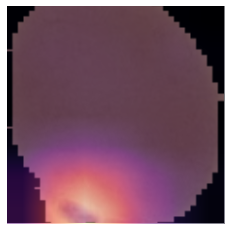

In [ ]:
heatMap(x,y,pred_data,learn)


# VGG16 Binary

In [ ]:
learn = create_cnn(data, models.vgg16_bn, metrics=accuracy, model_dir="/tmp/model/")


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


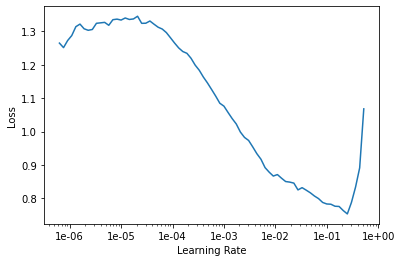

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6,1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.189879,0.275028,0.896571,04:50
1,0.178610,0.125146,0.955725,04:49
2,0.156615,0.117337,0.959354,04:51
3,0.138689,0.097226,0.964253,04:53
4,0.100415,0.090345,0.967701,04:55
5,0.105238,0.084673,0.968245,04:54


In [ ]:
learn.save('stage-1')


In [ ]:
learn.unfreeze()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


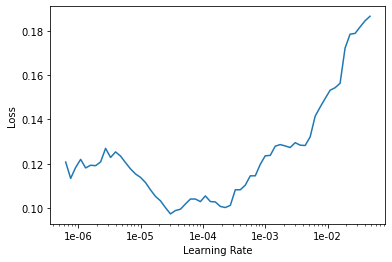

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(5e-6,5e-5 ))


epoch,train_loss,valid_loss,accuracy,time
0,0.099307,0.081669,0.970241,05:48
1,0.096231,0.077268,0.970967,05:50
2,0.091850,0.082390,0.968427,05:52
3,0.085006,0.078626,0.970423,05:53


In [ ]:
learn.save('stage-2')


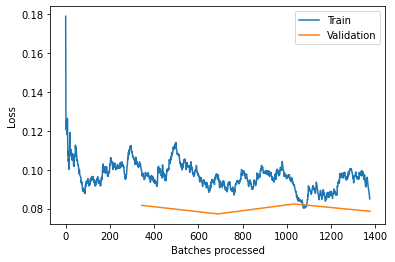

In [ ]:
learn.recorder.plot_losses()


In [ ]:
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.25,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=32, 
                                  num_workers=1).normalize(imagenet_stats)

# VGG19 Binary

In [ ]:
learn = create_cnn(data, models.vgg19_bn, metrics=accuracy, model_dir="/tmp/model/")


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


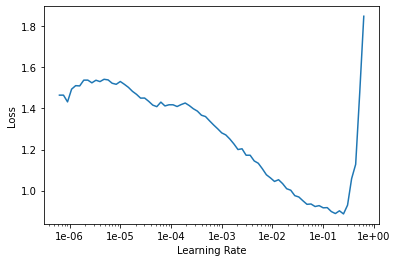

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6,1e-3)


epoch,train_loss,valid_loss,accuracy,time
0,0.257198,0.162980,0.947598,03:25
1,0.178984,0.126233,0.956162,03:25
2,0.143483,0.118257,0.963275,03:23
3,0.134386,0.100298,0.964146,03:23
4,0.117349,0.091477,0.966904,03:23
5,0.119747,0.090081,0.967630,03:24


In [ ]:
learn = cnn_learner(data, models.densenet201, metrics=accuracy, model_dir="/tmp/model/")


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


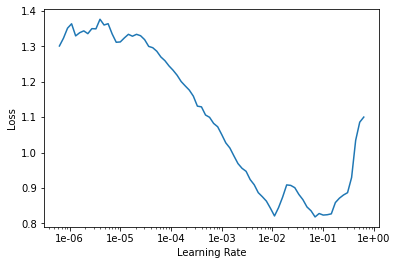

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [112]:
learn.fit_one_cycle(6,1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.187219,0.240482,0.942517,03:58
1,0.204989,0.125563,0.959501,03:55
2,0.159911,0.183916,0.940485,03:52
3,0.132649,0.195313,0.955727,03:52
4,0.112481,1.265499,0.961533,03:57
5,0.111002,0.374296,0.965307,03:58


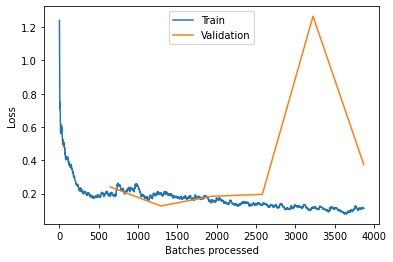

In [113]:
learn.recorder.plot_losses()


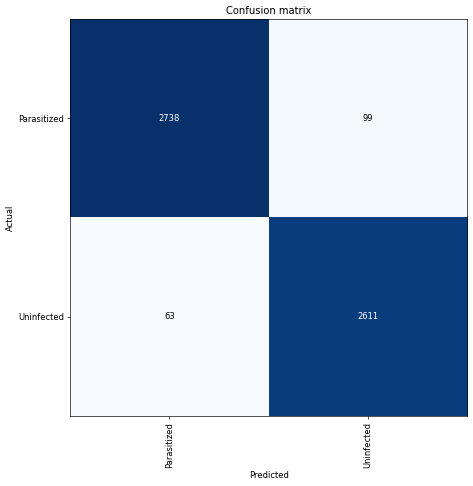

In [114]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)


# RESNET50

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torchvision import transforms, datasets, models
from torch.utils.data.sampler import SubsetRandomSampler



import os

In [ ]:

# Define your transforms for the training, validation, and testing sets


train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomVerticalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], 
                                                                 [0.229, 0.224, 0.225])])

In [ ]:
train_data = datasets.ImageFolder(img_dir,transform=train_transforms)


In [119]:
# number of subprocesses to use for data loading
num_workers = 0
# percentage of training set to use as validation
valid_size = 0.2

test_size = 0.1

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor((valid_size+test_size) * num_train))
valid_idx, test_idx, train_idx = indices[:valid_split], indices[valid_split:test_split], indices[test_split:]

print(len(valid_idx), len(test_idx), len(train_idx))

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=32, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=20, 
    sampler=test_sampler, num_workers=num_workers)

5511 2756 19291


In [120]:
model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(2048, 2, bias=True)

fc_parameters = model.fc.parameters()

for param in fc_parameters:
    param.requires_grad = True
    
model

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001 , momentum=0.9)

In [ ]:
def train(n_epochs, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate loss
            loss = criterion(output, target)
            
            # back prop
            loss.backward()
            
            # grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [123]:
train(25, model, optimizer, criterion, use_cuda, 'malaria_detection.pt')


Epoch 1, Batch 1 loss: 0.734315
Epoch 1, Batch 101 loss: 0.536362
Epoch 1, Batch 201 loss: 0.484392
Epoch 1, Batch 301 loss: 0.460792
Epoch: 1 	Training Loss: 0.460365 	Validation Loss: 0.379665
Validation loss decreased (inf --> 0.379665).  Saving model ...
Epoch 2, Batch 1 loss: 0.345061
Epoch 2, Batch 101 loss: 0.394510
Epoch 2, Batch 201 loss: 0.387315
Epoch 2, Batch 301 loss: 0.385836
Epoch: 2 	Training Loss: 0.386484 	Validation Loss: 0.355395
Validation loss decreased (0.379665 --> 0.355395).  Saving model ...
Epoch 3, Batch 1 loss: 0.396817
Epoch 3, Batch 101 loss: 0.384612
Epoch 3, Batch 201 loss: 0.381072
Epoch 3, Batch 301 loss: 0.376696
Epoch: 3 	Training Loss: 0.376917 	Validation Loss: 0.372811
Epoch 4, Batch 1 loss: 0.371685
Epoch 4, Batch 101 loss: 0.361163
Epoch 4, Batch 201 loss: 0.368749
Epoch 4, Batch 301 loss: 0.369146
Epoch: 4 	Training Loss: 0.368806 	Validation Loss: 0.351790
Validation loss decreased (0.355395 --> 0.351790).  Saving model ...
Epoch 5, Batch 1 l

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [124]:
model.load_state_dict(torch.load('malaria_detection.pt'))


<All keys matched successfully>

In [125]:
def test(model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(test_loader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
test(model, criterion, use_cuda)

Test Loss: 0.332693


Test Accuracy: 85% (2354/2756)


In [ ]:
def load_input_image(img_path):    
    image = Image.open(img_path)
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], 
                                                          [0.229, 0.224, 0.225])])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [ ]:
def predict_malaria(model, class_names, img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

Parasitized


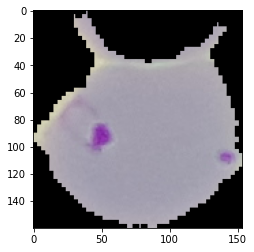

Parasitized


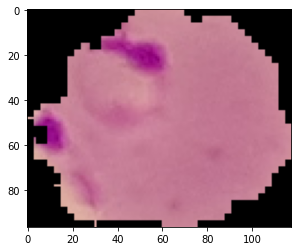

Parasitized


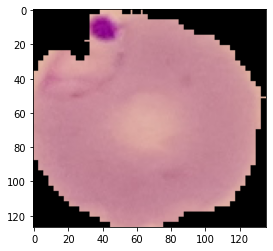

Uninfected


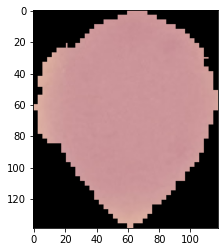

Uninfected


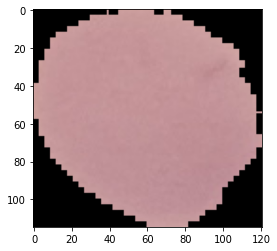

Uninfected


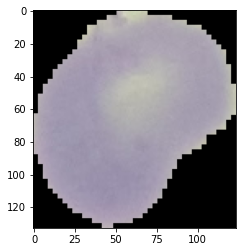

In [129]:
from glob import glob
from PIL import Image
from termcolor import colored

class_names=['Parasitized','Uninfected']
inf = np.array(glob("/content/cell_images/cell_images/Parasitized/*"))
uninf = np.array(glob("/content/cell_images/cell_images/Uninfected/*"))
for i in range(3):
    img_path=inf[i]
    img = Image.open(img_path)
    if predict_malaria(model, class_names, img_path) == 'Parasitized':
        print(colored('Parasitized', 'green'))
    else:
        print(colored('Uninfected', 'red'))
    plt.imshow(img)
    plt.show()
for i in range(3):
    img_path=uninf[i]
    img = Image.open(img_path)
    if predict_malaria(model, class_names, img_path) == 'Uninfected':
        print(colored('Uninfected', 'green'))
    else:
        print(colored('Parasitized', 'red'))        
    plt.imshow(img)
    plt.show()